<a href="https://colab.research.google.com/github/eisbetterthanpi/pytorch/blob/main/Unit_1_huggingface_rl_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym[box2d] stable-baselines3[extra] #huggingface_sb3 pyglet ale-py==0.7.4
import gym
# https://huggingface.co/models?pipeline_tag=reinforcement-learning&sort=downloads
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
state [ 0.00753279  1.4118962   0.7629716   0.04336127 -0.00872179 -0.17282452
  0.          0.        ] (8,)
[ 0.0149828   1.412293    0.7515303   0.01757826 -0.01517433 -0.1290621
  0.          0.        ]
(400, 600, 3)


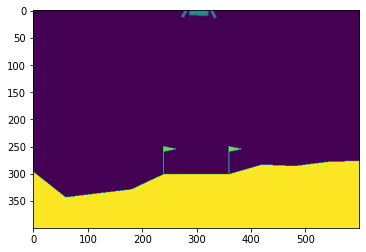

In [ ]:
# !apt install python-opengl ffmpeg xvfb
# https://github.com/openai/gym/issues/1898#issuecomment-860034155
!apt-get install python-opengl -y xvfb
!pip install pyvirtualdisplay 
from pyvirtualdisplay import Display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()


# init Environment
# env = gym.make("CartPole-v0")
env = gym.make("LunarLander-v2")
action_space = env.action_space.n
state_space = env.observation_space.shape[0]
max_reward = 200 #CartPole-v0

state = env.reset()
print("state",state,state.shape)
action = env.action_space.sample() # Take a random action
observation, reward, done, info = env.step(action)
print(observation)
display = Display(visible=0, size=(1400, 900))
display.start()
screen = env.render('rgb_array')

import matplotlib.pyplot as plt
plt.imshow(screen)
plt.imshow(screen[:,:,0])
plt.grid(False)
print(screen.shape) #(400, 600, 3)


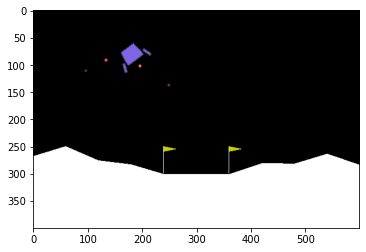

In [ ]:
env = gym.make("LunarLander-v2")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

from IPython import display
# https://stackoverflow.com/questions/50107530/how-to-render-openai-gym-in-google-colab
for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
#   ipythondisplay.clear_output(wait=True)
#   ipythondisplay.display(plt.gcf())
  display.display(plt.gcf())
  display.clear_output(wait=True)
  if done:
    break

# ipythondisplay.clear_output(wait=True)
env.close()

In [ ]:
# env = gym.make("LunarLander-v2")
env = make_vec_env('LunarLander-v2', n_envs=16)
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

model = PPO(
    policy = 'MlpPolicy', #MultiLayerPerceptron for when input is a vector
    # policy = 'CnnPolicy', #for when input are frames
    env = env,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    device=device,)

model.learn(total_timesteps=10000) # 500000 Train the agent
model.save("ppo-LunarLander-v2") # Save the model

In [ ]:
# evaluate
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")
# https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading
# mean_reward=-21.81 +/- 17.647
############### end ###################